In [27]:
from letter import gxl2Graph
import json
import networkx as nx
import matplotlib.pyplot as plt
from EMD import GGMD
import numpy as np
from ggd import ggd
from graph import Point, Graph

In [28]:
data = open('../data/PROTOTYPE/A_prototype.json')
gxl = json.load(data)
g1 = gxl2Graph(gxl, 'u')

#data = open('../data/Letter/json/LOW/AP1_0012.json')
data = open('../data/PROTOTYPE/E_prototype.json')
gxl = json.load(data)
g2 = gxl2Graph(gxl, 'v')

G1, G2 = g1.toNX(), g2.toNX()

In [29]:
cost, flow, D = GGMD(g2, g1, 2, 1, 1000)
for u in flow.values():
    for v, w in u.items():
        u[v] = { 'weight': w } 
F = nx.DiGraph(flow)
F.remove_node("eps1")
F.remove_node("eps2")
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w == 0])

In [30]:
c, f = ggd(g2, g1, 2, 1)
H = nx.DiGraph(f)

In [31]:
pos1 = nx.get_node_attributes(G1,  'coords')
pos2 = nx.get_node_attributes(G2,  'coords')

#pos1 = { u.label: u.coords for u in g1.vertices }
#pos2 = { u.label: u.coords for u in g2.vertices }

for k in pos2.keys():
        pos2[k] = np.add( pos2[k], (4,0))
pos = pos1 | pos2
#pos = {"eps1": (0, 3), "eps2": (0, -3)}

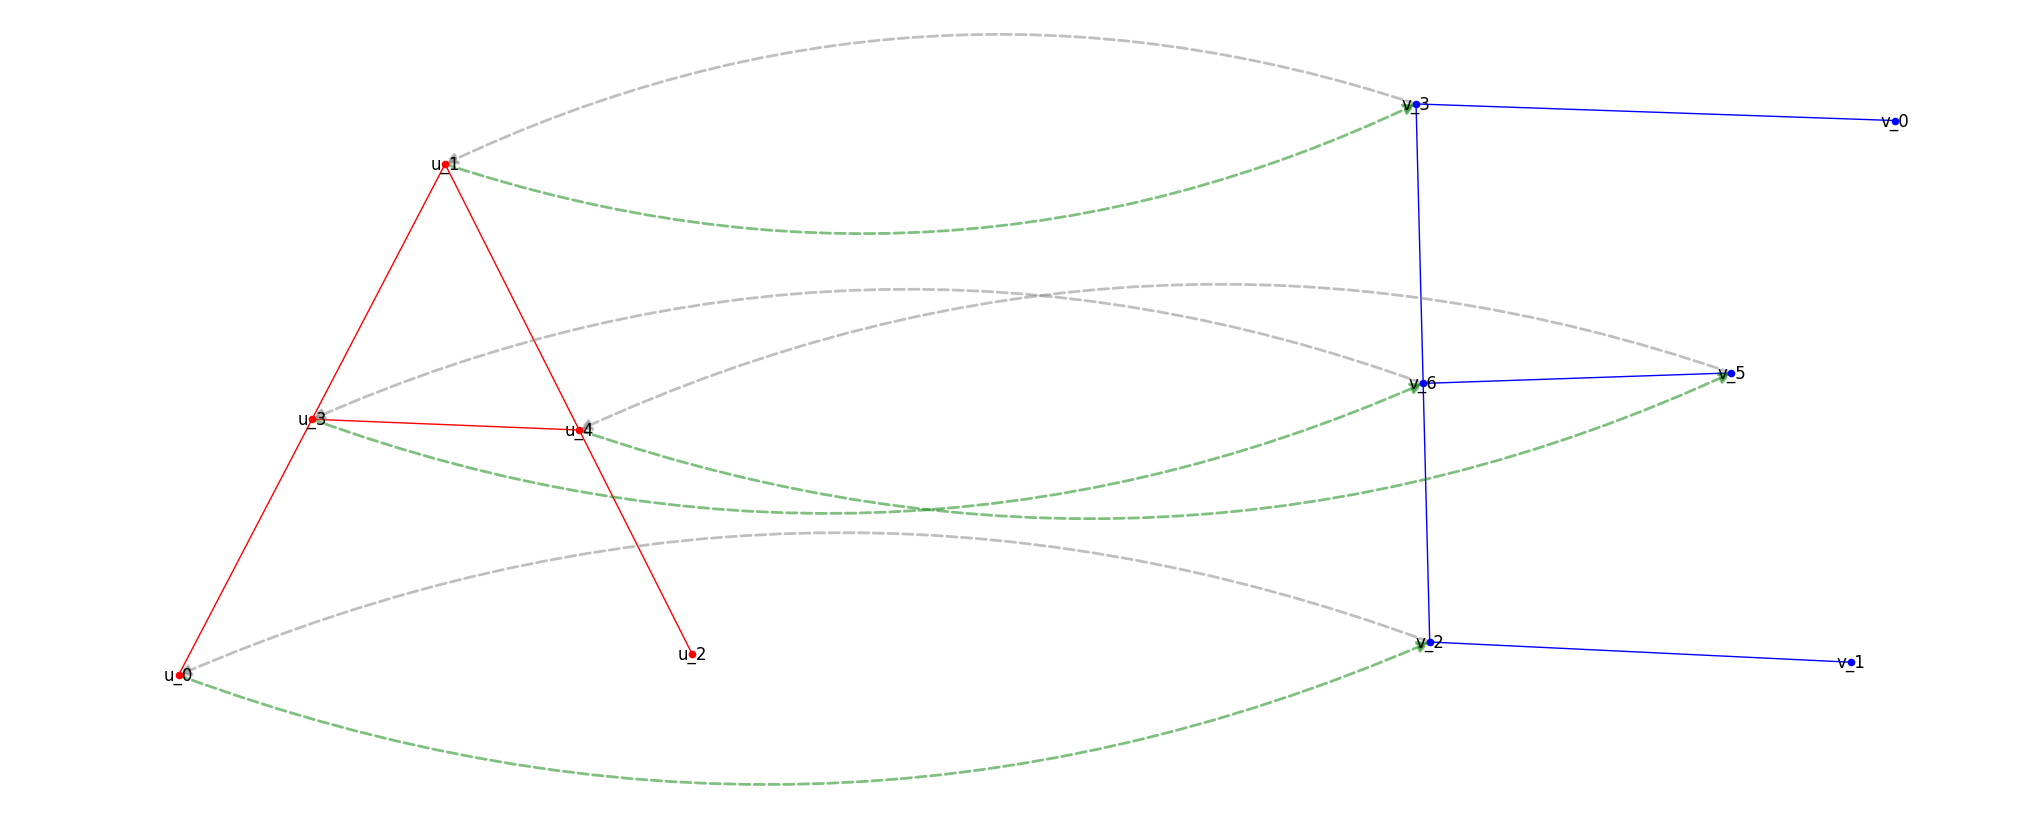

In [32]:
fig = plt.figure(figsize=(20, 8))
nx.draw(G1, pos1, edge_color = "red", node_color = "red", node_size = 20, with_labels = True)
nx.draw(G2, pos2, edge_color = "blue", node_color = "blue", node_size = 20, with_labels = True)
nx.draw(F, pos, edge_color = "gray", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)

nx.draw(H, pos, edge_color = "green", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)
# 
# weights = nx.get_edge_attributes(F, 'weight').values()
# nx.draw(F, pos, **options, width=list(weights))

In [22]:
c, cost

(8.721514021480209, 7.935)

In [23]:
p1 = Point((0,0), 'u_0')
p2 = Point((1,0), 'u_1')
p3 = Point((4,0), 'u_2')

q1 = Point((0,0), 'v_0')
q2 = Point((1,0), 'v_1')
q3 = Point((3,0), 'v_2')


In [24]:
g1 = Graph([p1, p2, p3], [[p2, p1]])

In [25]:
g2 = Graph([q1, q2, q3], [[q2, q1], [q2, q3]])

In [26]:
ggd(g1, g2, 1, 1)

(2.0, [('u_0', 'v_0'), ('u_1', 'v_1')])